In [1]:

import sys
sys.path.insert(0, '../src')

%matplotlib inline

# Eligibility Traces

Eligibility traces unify temporal-difference(TD) and Monte Carlo methods while offering advantages over $n$-step TD methods. The trace-decay parameter $\lambda \in [0, 1]$, common to methods that use eligibility traces, controls the rate at which the traces vanish. When $\lambda = 1$ the algorithm functions like Monte Carlo, while at $\lambda = 0$ the algorithm functions like one-step TD methods. The benefits over $n$-step methods are (1) only a single trace vector must be kept in memory instead of $n$ feature vectors, and (2) learning can take place immediately after executing an action instead of being delayed for $n$ steps. Most TD methods can make use of eligibility traces to obtain the advantages mentioned above.

$\lambda$-return

$$ G_t^\lambda = (1 - \lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_{t:t+n}$$

# Approximate Action Value Methods

The goal here is to learn approximate action-values $\hat{q}(s, a, \mathbf{w})$

# Sarsa($\lambda$) with function approximation

In [2]:
from sarsa_lambda_approx import * 
plt.rcParams["figure.figsize"] = (10,10)

Sarsa($\lambda$) has different versions of the algorithm. For this assignment, we chose to implement *True online Sarsa($\lambda$)* that is described in [p. 307 Reinforcement Learning: An Introduction]

## Features

$\mathbb{x}: S^+ \times \mathcal{A} \rightarrow \mathcal{R}^d$

As the features for the linear approximator, we extract the row and column position based on the current state and do the same for the next state simulated by the given action. These values are then combined into polynomials that are used as the feature vector. Normalization based on the grid size was also applied to keep the gradients from exploding.

The final polynomial used for the current state (after extracting the row and column index, $row$, $col$) was:
$$[row_t + col_t + row_t * col_t + row_t^2 + col_t^2 + row_t^3 + col_t^3 + row_t^4 + col_t^4]$$

The full feature vector is the sum of the polynomial for the current state, the same polynomial but for the the next state based on the action and a bias term. Totaling 19 features, we note that this representation is much more memory efficient than the tabular implementation.

We note that this approach hard-coded environment dynamics into the features.

## Deterministic Environment

We train the reinforcement learning agent with every combination of the following parameters:

$\epsilon \in \{ 0.01 \}$

$\alpha \in \{ 0.1, 0.001, 0.00001 \}$

$\gamma \in \{ 1.0 \}$

$\lambda \in \{ 0, 0.4, 0.6, 1 \}$

The reported win ratio is obtained by running the agent greedly ($\epsilon=0$) for 100 episodes.

In [3]:
report_sarsa_approx(stochastic=False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.10000,0.0,0.01,100.0,4.648240
1,1500.0,1.0,0.10000,0.4,0.01,0.0,14.164267
2,1500.0,1.0,0.10000,0.6,0.01,0.0,13.561864
3,1500.0,1.0,0.10000,1.0,0.01,0.0,13.704133
4,2000.0,1.0,0.10000,0.0,0.01,100.0,7.422519
5,2000.0,1.0,0.10000,0.4,0.01,100.0,19.954181
6,2000.0,1.0,0.10000,0.6,0.01,0.0,20.204790
7,2000.0,1.0,0.10000,1.0,0.01,0.0,20.330888
8,1500.0,1.0,0.00100,0.0,0.01,100.0,3.897728
9,1500.0,1.0,0.00100,0.4,0.01,100.0,3.486637


For the deterministic environment, we observe multiple configurations obtained found the optimal policy. To go into details, we train one such configuration again to obtain the model parameters.

In [4]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
# Reset the seed
np.random.seed(42)
random.seed(42)
env.seed(42)

w, stats = sarsa_lambda_approx(
        env, 1500, alpha=1e-1, epsilon=0.01, discount=1.0, trace_decay=0.0)

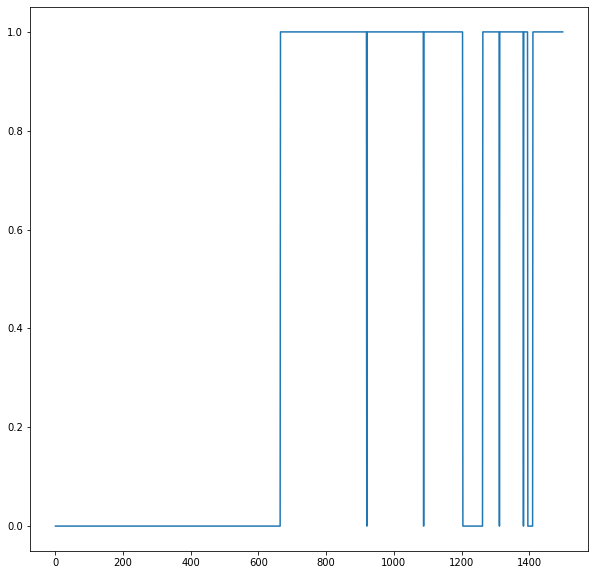

In [5]:
plt.plot(stats)

# TODO: Esse plot ficou ruim no relatório

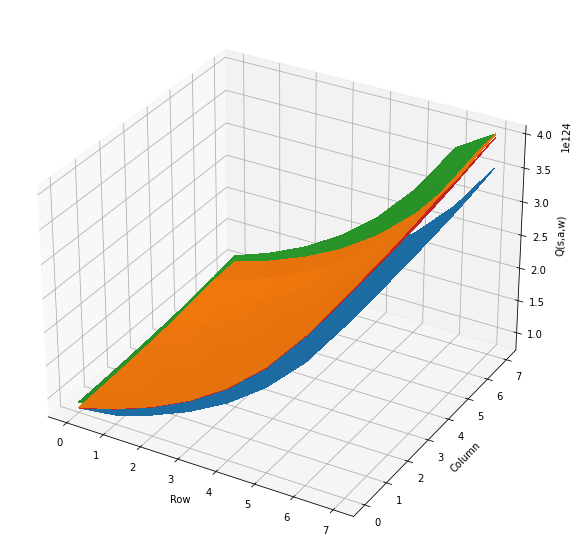

In [6]:
fig = plot_action_value(w)

## Stochastic Environment

Since the stochastic environment by definition takes a random action with probability $p$, we decided to train the agent with a strictly greedy policy ($\epsilon=0$)

$\epsilon \in \{ 0 \}$

$\alpha \in \{ 0.1, 0.001, 0.00001 \}$

$\gamma \in \{ 1.0 \}$

$\lambda \in \{ 0, 0.4, 0.6, 1 \}$


In [7]:
report_sarsa_approx(stochastic=True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.10000,0.0,0.0,0.0,4.677286
1,1500.0,1.0,0.10000,0.4,0.0,0.0,4.823706
2,1500.0,1.0,0.10000,0.6,0.0,0.0,4.942792
3,1500.0,1.0,0.10000,1.0,0.0,0.0,4.770615
4,2000.0,1.0,0.10000,0.0,0.0,0.0,6.559912
5,2000.0,1.0,0.10000,0.4,0.0,6.0,7.501658
6,2000.0,1.0,0.10000,0.6,0.0,6.0,7.703398
7,2000.0,1.0,0.10000,1.0,0.0,0.0,8.535267
8,1500.0,1.0,0.00100,0.0,0.0,0.0,5.820004
9,1500.0,1.0,0.00100,0.4,0.0,0.0,4.860498


In [8]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
# Reset the seed
np.random.seed(42)
random.seed(42)
env.seed(42)

w, stats = sarsa_lambda_approx(
        env, 2000, alpha=1e-3, epsilon=0, discount=1.0, trace_decay=0.6)

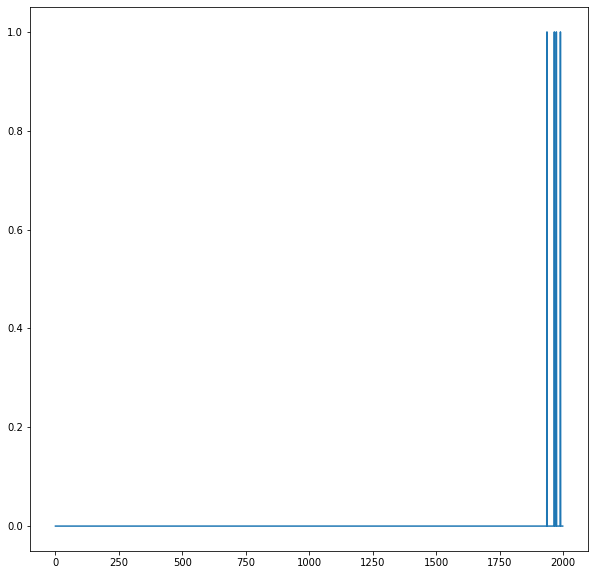

In [9]:
plt.plot(stats)

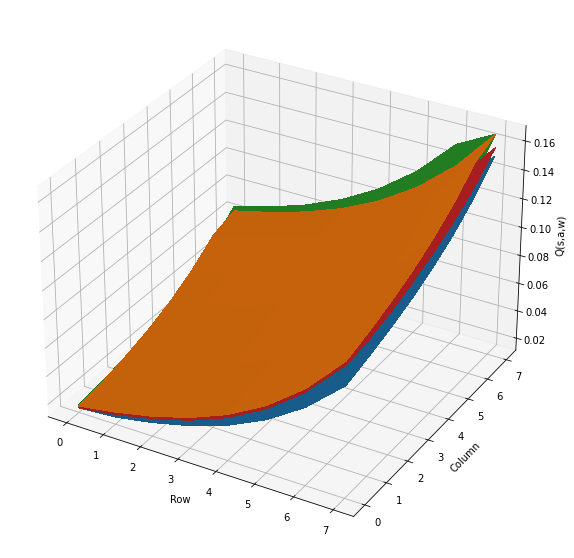

In [10]:
fig = plot_action_value(w)